## Import Data

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('./data/cleaned_ames.csv')

In [3]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,no_feature,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,no_feature,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,no_feature,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,no_feature,0,3,2010,WD,Normal,189900


## Feature Engenieering

In [4]:
df.corr()['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.799262
gr_liv_area        0.706780
garage_cars        0.647562
garage_area        0.640138
total_bsmt_sf      0.632529
1st_flr_sf         0.621676
year_built         0.558426
full_bath          0.545604
year_remod/add     0.532974
mas_vnr_area       0.508285
totrms_abvgrd      0.495474
fireplaces         0.474558
bsmtfin_sf_1       0.433147
wood_deck_sf       0.327143
open_porch_sf      0.312951
half_bath          0.285056
bsmt_full_bath     0.275823
2nd_flr_sf         0.269373
lot_area           0.266549
garage_yr_blt      0.253835
lot_frontage       0.210716
bsmt_unf_sf        0.183308
bedroom_abvgr      0.143913
screen_porch       0.112151
pool_area          0.068403
mo_sold            0.035259
3ssn_porch         0.032225
bsmtfin_sf_2       0.006018
misc_val          -0.015691
yr_sold           -0.030569
bsmt_half_bath    -0.035817
low_qual_fin_sf   -0.037660
ms_subclass       -0.085092
overall_cond      -0.101697
kitchen_abvgr     -0

In [5]:
X = df[['overall_qual', 'gr_liv_area', 'garage_cars','garage_area', 
      'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath','year_remod/add', 'kitchen_abvgr',
        'totrms_abvgrd','bsmtfin_sf_1', 'fireplaces']]
dummy_features =df[['overall_cond', 'condition_1', 'bldg_type', 'neighborhood', 'misc_feature','garage_type']]

In [6]:
poly = PolynomialFeatures(interaction_only = True, include_bias=False)

In [7]:
x_poly = poly.fit_transform(X)

In [8]:
df_poly = pd.DataFrame(x_poly, columns = poly.get_feature_names(X.columns))

In [9]:
df_poly = df_poly.drop(columns = X.columns)

In [10]:
df_poly.columns

Index(['overall_qual gr_liv_area', 'overall_qual garage_cars',
       'overall_qual garage_area', 'overall_qual total_bsmt_sf',
       'overall_qual 1st_flr_sf', 'overall_qual year_built',
       'overall_qual full_bath', 'overall_qual year_remod/add',
       'overall_qual kitchen_abvgr', 'overall_qual totrms_abvgrd',
       'overall_qual bsmtfin_sf_1', 'overall_qual fireplaces',
       'gr_liv_area garage_cars', 'gr_liv_area garage_area',
       'gr_liv_area total_bsmt_sf', 'gr_liv_area 1st_flr_sf',
       'gr_liv_area year_built', 'gr_liv_area full_bath',
       'gr_liv_area year_remod/add', 'gr_liv_area kitchen_abvgr',
       'gr_liv_area totrms_abvgrd', 'gr_liv_area bsmtfin_sf_1',
       'gr_liv_area fireplaces', 'garage_cars garage_area',
       'garage_cars total_bsmt_sf', 'garage_cars 1st_flr_sf',
       'garage_cars year_built', 'garage_cars full_bath',
       'garage_cars year_remod/add', 'garage_cars kitchen_abvgr',
       'garage_cars totrms_abvgrd', 'garage_cars bsmtfin_sf_

In [11]:
new_df = pd.concat([df_poly, dummy_features], axis =1)
new_df.head()

,overall_qual gr_liv_area,overall_qual garage_cars,overall_qual garage_area,overall_qual total_bsmt_sf,overall_qual 1st_flr_sf,overall_qual year_built,overall_qual full_bath,overall_qual year_remod/add,overall_qual kitchen_abvgr,overall_qual totrms_abvgrd,...,kitchen_abvgr fireplaces,totrms_abvgrd bsmtfin_sf_1,totrms_abvgrd fireplaces,bsmtfin_sf_1 fireplaces,overall_cond,condition_1,bldg_type,neighborhood,misc_feature,garage_type
0,9936.0,12.0,3168.0,6480.0,9936.0,11760.0,6.0,11760.0,6.0,42.0,...,2.0,4473.0,14.0,1278.0,5,Norm,1Fam,NAmes,no_feature,Attchd
1,4480.0,5.0,3650.0,4410.0,4480.0,9805.0,5.0,9805.0,5.0,25.0,...,0.0,2340.0,0.0,0.0,6,Feedr,1Fam,NAmes,no_feature,Attchd
2,7974.0,6.0,1872.0,7974.0,7974.0,11748.0,6.0,11748.0,6.0,36.0,...,0.0,5538.0,0.0,0.0,6,Norm,1Fam,NAmes,Gar2,Attchd
3,14770.0,14.0,3654.0,14770.0,14770.0,13776.0,14.0,13776.0,7.0,56.0,...,2.0,8520.0,16.0,2130.0,5,Norm,1Fam,NAmes,no_feature,Attchd
4,8145.0,10.0,2410.0,4640.0,4640.0,9985.0,10.0,9990.0,5.0,30.0,...,1.0,4746.0,6.0,791.0,5,Norm,1Fam,Gilbert,no_feature,Attchd


## Linear Regression Model 

In [12]:
X = new_df
X = pd.get_dummies(columns = dummy_features.columns, data=X, drop_first = True)

y = df['saleprice']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train, y_train)

0.9306894471915131

In [16]:
lr.score(X_test, y_test)

0.863838900418044

In [17]:
y_preds = lr.predict(X_train)

In [18]:
resids =y_train - y_preds

Text(0, 0.5, 'resids')

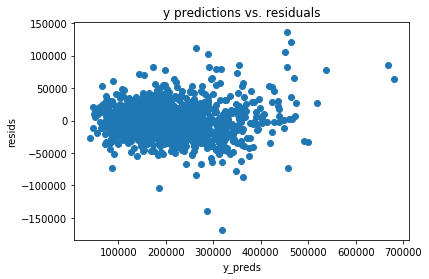

In [19]:
plt.scatter(y_preds, resids)
plt.title ('y predictions vs. residuals')
plt.xlabel('y_preds')
plt.ylabel('resids')

## Ridge

In [20]:
r_alphas = np.logspace(0,5, 100)

In [21]:
ridge_cv = RidgeCV(
    alphas = r_alphas,
    scoring = 'r2',
    cv = 5
)
ridge_cv.fit(X_train, y_train);

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.84748e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.8957e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.81652e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.9706e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.78252e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.24385e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.30375e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.35727e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.0122e-16): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03779e-16): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

In [22]:
ridge_cv.alpha_

1.2618568830660204

In [23]:
ridge_cv.score(X_train, y_train)

0.9286187087791781

In [24]:
ridge_cv.score(X_test, y_test)

0.8849843934222574

##  Lasso 

In [25]:
l_alphas = np.logspace(-3, 0, 100)

In [26]:
lcv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

In [27]:
lcv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361061522661.70325, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360191557360.9597, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359655959919.4047, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354762153748.5467, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354707581060.9411, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354656606118.8141, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354053630905.722, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354046918205.6048, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354040657440.69135, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353966375232.5454, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353965551788.1009, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353964783181.3925, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364329145341.3156, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364261416086.92725, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364198200918.3975, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363425908296.8544, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363416092348.3618, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363406807827.97314, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363285078048.35583, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363283936166.58984, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363282874831.20844, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354861073216.2345, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354750013643.7003, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354647380220.9702, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353442528837.91254, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353428750230.0183, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353415856759.54443, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353246306052.89966, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353243311827.9787, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353240360685.28156, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351237942740.7659, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350544556975.48035, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350248711348.3018, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348916277555.79205, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348903440864.10254, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348891407336.28345, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348734968012.8816, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348732431969.8304, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348729957907.61456, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348666827851.86035, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348665117261.7532, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348663405736.8819, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365103196980.02, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365035643322.04865, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364972764278.9281, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364216166943.94666, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364206798586.02673, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364197916749.6161, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364098701985.7539, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364098029180.4636, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364097395853.7026, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000)

In [28]:
lcv.score(X_train, y_train)

0.9304674489724969

In [29]:
lcv.score(X_test, y_test)

0.8690333954636358

## Pipline 

In [32]:
pipe_lasso = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])

In [33]:
pipe_lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1469538881.5177002, tolerance: 1332265093.5048566
  positive)


Pipeline(steps=[('ss', StandardScaler()), ('lcv', LassoCV())])

In [34]:
pipe_lasso.score(X_train, y_train),pipe_lasso.score(X_test, y_test)

(0.9184864448426425, 0.8901008701077208)

In [35]:
pip_df = pd.DataFrame(zip(pipe_lasso['lcv'].coef_ ,X.columns))

In [36]:
pip_df[pipe_lasso['lcv'].coef_ == 0].head(15)

,0,1
1,0.0,overall_qual garage_cars
5,-0.0,overall_qual year_built
6,-0.0,overall_qual full_bath
9,0.0,overall_qual totrms_abvgrd
13,0.0,gr_liv_area garage_area
14,-0.0,gr_liv_area total_bsmt_sf
15,-0.0,gr_liv_area 1st_flr_sf
16,0.0,gr_liv_area year_built
18,-0.0,gr_liv_area year_remod/add
19,-0.0,gr_liv_area kitchen_abvgr
